<a href="https://colab.research.google.com/github/thaisviana/Bootcamp-Ciencia-de-Dados/blob/master/analise_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT IA- NLP

## Análise de sentimento

Links

* [kaggle datasets](https://www.kaggle.com/datasets?search=portuguese-tweets-for-sentiment-analysi)
* [Feldman, R. (2013). Techniques and applications for sentiment analysis.](sci-hub.se/10.1145/2436256.2436274)
* [link]()




In [151]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import RSLPStemmer
import re

In [152]:
!pip install emoji

In [153]:
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [154]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [155]:
# no_theme = pd.read_csv('NoThemeTweets.csv', index_col=0)
# theme_hahs = pd.read_csv('TweetsNeutralHash.csv', index_col=0)
theme_news = pd.read_csv('TweetsNeutralNews.csv', index_col=0)
theme = pd.read_csv('TweetsWithTheme.csv', index_col=0)

In [156]:
data = pd.concat([theme_news, theme ])


In [157]:
#data.describe()
# data[data['sentiment'] == 'Negativo']

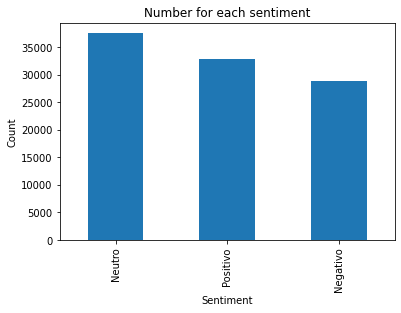

In [158]:
series = data['sentiment'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

## Pré-processamento de texto

In [159]:
import unicodedata
def normalize(data):
  """ Normalise (normalize) unicode data in Python to remove umlauts, accents etc. """
  return unicodedata.normalize('NFKD', data).encode('ASCII', 'ignore')

In [160]:
stemmer_ptbr = RSLPStemmer()
import emoji
def stemming_tokenizer(str_input):  
    raw_text = emoji.demojize(str_input, delimiters=("", ""), language='pt')
    raw_text = re.sub(r'@[\w]*', "mencao", raw_text) 
    raw_text = re.sub(r'@[\d]*', "numero", raw_text) 
    raw_text = re.sub(r'https://[\w]*', "link", raw_text)
    raw_text = re.sub(r'http://[\w]*', "link", raw_text)
    raw_text = normalize(raw_text).decode('utf-8')
    raw_text = raw_text.replace('.', '').replace('!', '').replace('?', '').replace(',', '').replace(')', '').replace('(', '').replace('"', '').replace('“', '').replace('‘', '').replace('~', '').replace(':', '')
    raw_text = raw_text.replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace('|', '')
    words = raw_text.lower().split()
    words = [stemmer_ptbr.stem(word) for word in words if word not in stopwords]
    #words = [word for word in words if word not in stopwords]
    return words

In [161]:
stemming_tokenizer("naïve café @lalala @_lalal @TR_amama @haha @HahHaa 🔥 🔥")

['naive', 'cafe', 'fogo', 'fogo']

In [162]:
vectorizer_tfidf = TfidfVectorizer(stop_words=stopwords, tokenizer=stemming_tokenizer)
X = vectorizer_tfidf.fit_transform(data.tweet_text)
vocab = np.array(vectorizer_tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ate', 'eramos', 'estao', 'estavamos', 'estiveramos', 'estivessemos', 'foramos', 'fossemos', 'ha', 'hao', 'houveramos', 'houverao', 'houveriamos', 'houvessemos', 'ja', 'nao', 'sao', 'sera', 'serao', 'seriamos', 'so', 'tambem', 'tera', 'terao', 'teriamos', 'tinhamos', 'tiveramos', 'tivessemos', 'voce', 'voces'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [163]:
X

<99147x129735 sparse matrix of type '<class 'numpy.float64'>'
	with 1162121 stored elements in Compressed Sparse Row format>

In [164]:
y = data.sentiment.apply(lambda x : 0 if x == 'Negativo' else (1 if x == 'Neutro' else 2))
y

id
1038992008461930496    1
1038873557902782465    1
1038869931398516736    1
1038867128886198273    1
1038859914339409920    1
                      ..
1055096632600080384    2
1055204789058002949    2
1054982223793938433    2
1055144918451187714    0
1055068278882791425    2
Name: sentiment, Length: 99147, dtype: int64

## Classificação

### Árvores de Decisão e Florestas Randomicas

Referências : 

1- [Fast.ai - Aula 1 | Code First](https://course18.fast.ai/lessonsml1/lesson1.html)

2- [Fast.ai - Aula 2 | Conceitos](https://course18.fast.ai/lessonsml1/lesson2.html)

3- [MIT OCW - Aula Conceitual + Math](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-034-artificial-intelligence-fall-2010/lecture-videos/lecture-11-learning-identification-trees-disorder/)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

In [ ]:
#predicted = m.predict_proba(X_test)
predicted = m.predict(X_test)
predicted

In [ ]:
importances = m.feature_importances_
sem_importancia = []
for i,w in enumerate(importances):
  if w == 0:
    sem_importancia.append(vocab[i])
    print(vocab[i],w)

In [169]:
importances = m.feature_importances_
c_importancia = []
for i,w in enumerate(importances):
  if w > 0:
    c_importancia.append(vocab[i])
    print(vocab[i],w)

#agoraehaddad 1.6044616781404365e-06
#bolsonaro 8.496494913855792e-05
#bolsonaro17 2.9494646602656084e-06
#bolsonaro2018 0.0002424265150047814
#bolsonaroamordobrasil 1.7659024544715532e-05
#bolsonaronojornalnacional 0.0001570312194846817
#bolsonaropresidente 0.00017266473119413906
#bolsonaropresidente17 0.0001338502117211325
#bolsonarosim 0.0003925884868397775
#brasil 0.0001506635731725589
#cassacaodobolsonaro 3.742651124975084e-06
#ciro12 0.00018747600213798394
#cironaglobo 4.028075180496673e-06
#ciropresidente12 5.026719274848112e-06
#comprova 1.7867435798554745e-07
#debateaparecida 2.2692791116826432e-05
#debateband 0.00017990468806312936
#debatenaglobo 9.05991608343282e-05
#debateredetv 2.2144818649668942e-05
#debatesbt 2.5895835774090227e-06
#democraciasim 7.035073830976263e-07
#direitaseguedireita 2.9132882488442383e-05
#eleicoes2018 0.004539379011460943
#elejamais 2.0339295564311425e-06
#elenao 0.006212408182438782
#elenunca 0.00019793768241656897
#elesim 8.583913074385718e-05
#

In [173]:
len(sem_importancia)

125865

## Acurácia

In [172]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.786576606864513